# Logistic Regression (SUV purchase Use Case)

#### 1. Initial Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2. Load data
Load Pandas DataFrame from CSV file

In [2]:
suv_data = pd.read_csv('suv.csv')

#### 3. Build the independent and dependent variable arrays

During the exploratory analysis phase, I chose 'Age', 'Gender' and 'EstimatedSalary' as the *independent variables*; and set 'Purchased' as the *dependent variable*.

This means that the logistic regression will try to predict whether a client will purchase an SUV car (1) or not (0) depending on the clients age, gender and salary; or a subset of these.

Remember the structure of the DataFrame:

In [3]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


I will not need the "User ID" column.

In [4]:
clean_data = suv_data.drop(['User ID'], axis=1)
clean_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Now I need to make 'Gender' column a numerical column (1 for Female, 0 for Male):

"Gender" column may be removed, since it does not have a big impact in the results.

In [5]:
clean_data['Gender'] = clean_data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
# clean_data.drop(['Gender'], axis=1, inplace=True) # Uncomment to try model without Gender, but better results are achieved with Gender
clean_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


Ensure that there are no null values in this cleaned DataFrame:

In [6]:
print(clean_data.isnull().sum().sum())

0


Extract X (dependent variables) and y (independent variable) from the cleaned DataFrame:

In [7]:
X = clean_data.drop(['Purchased'], axis=1)
y = clean_data['Purchased'].values
print(X.head(), '\n')
print(y[0:10])

   Gender  Age  EstimatedSalary
0       0   19            19000
1       0   35            20000
2       1   26            43000
3       1   27            57000
4       0   19            76000 

[0 0 0 0 0 0 0 1 0 0]


#### 5. Scale the independent variables

Import StandardScaler class and initialise object:

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Scale the independent variables to same distribution (mean = 0, variance = 1):

In [9]:
norm_X = sc.fit_transform(X)
norm_X

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

#### 6. Split into train and test data

Given a test size (in this case, 25% of the whole sample), randomly divide the entries between train data, which will be used to train the model; and test data, which will be used to test the model's predictions.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
len(X_train), len(X_test)

(300, 100)

#### 7. Build and train logistic regression model

Import LogisticRegression class and initialise object:

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=10)

Fit the train data to the model:

In [12]:
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

#### 8. Apply trained model to the test data and check results

Use the model to make predictions (0/1 whether or not the client will buy an SUV) from the test entries' dependent variables:

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Import classification_report function and create report regarding how well the model has classified this train data (y_pred), compared to the actual true classification (y_test):

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



Import confusion_matrix function and create confusion matrix:

In [15]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(cf_matrix, columns=['Predicted 0s','Predicted 1s'], index=['Actual 0s','Actual 1s'])

,Predicted 0s,Predicted 1s
Actual 0s,61,2
Actual 1s,10,27


#### 9. Predict probabilities instead of 0/1

In reality, a logistic regression actually generates values (probabilities) between 0 and 1. When the value is higher than 0.5 it is assigned to 1. On the other hand, when the value is lower than 0.5, it is assigned to 0.

Instead of directly obtaining the 0/1 classification, I want to reach the actual probabilities in each case.

In [16]:
y_test_probs = model.predict_proba(X_test)
y_test_probs[0:5]

array([[0.7439731 , 0.2560269 ],
       [0.02973754, 0.97026246],
       [0.97774951, 0.02225049],
       [0.16069512, 0.83930488],
       [0.98368824, 0.01631176]])

Now I search for the cases in which we are failing to predict well, and I check the probability values:

In [17]:
wrong_indices = []
for i in range(len(y_test)):
    real, pred = y_test[i], y_pred[i]
    if real != pred:
        print('{}, real: {}, predicted: {}, predicted probability: {}'
              .format(i, real, y_pred[i], y_test_probs[i][1]))
        wrong_indices.append(i)

17, real: 0, predicted: 1, predicted probability: 0.6406241038147275
22, real: 1, predicted: 0, predicted probability: 0.3375557452001464
26, real: 0, predicted: 1, predicted probability: 0.5451155889791178
30, real: 1, predicted: 0, predicted probability: 0.385625241342253
40, real: 1, predicted: 0, predicted probability: 0.45801389147395805
43, real: 1, predicted: 0, predicted probability: 0.31667429451067813
65, real: 1, predicted: 0, predicted probability: 0.26293053410222067
74, real: 1, predicted: 0, predicted probability: 0.4191489366633192
79, real: 1, predicted: 0, predicted probability: 0.2686614592041106
81, real: 1, predicted: 0, predicted probability: 0.3305695592629724
85, real: 1, predicted: 0, predicted probability: 0.38950423496340897
99, real: 1, predicted: 0, predicted probability: 0.4198652953617394


It seems like all probabilities of the entries we fail to classifiy correctly fall between 0.25 and 0.75, which make sense. These probabilities indicate that the model is not (so) that sure if assigning 0 or 1.

Let's check the probability distribution for all entries, not only the miss-classified:

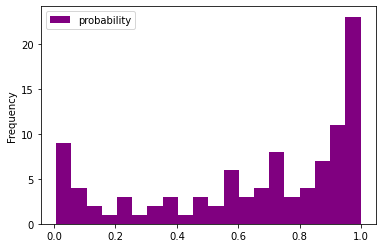

In [18]:
y_probabilities = []
for prob_0, prob_1 in y_test_probs:
    y_probabilities.append(prob_0)
y_probabilities = np.array(y_probabilities)

df = pd.DataFrame(data=y_probabilities, columns=['probability'])

df.plot.hist(bins=20, color='purple')
plt.show()

Lots of probability values are outside the 0.25-0.75 range. Let's check exactly how many:

In [19]:
def get_probability_group(prob):
    if prob < 0.25:
        return '<0.25'
    elif prob <= 0.75:
        return '0.25-0.75'
    else:
        return '>0.75'
    
df['probability_group'] = df['probability'].apply(get_probability_group)
df.head()

,probability,probability_group
0,0.743973,0.25-0.75
1,0.029738,<0.25
2,0.977750,>0.75
3,0.160695,<0.25
4,0.983688,>0.75


probability_group
0.25-0.75    33
<0.25        19
>0.75        48
dtype: int64


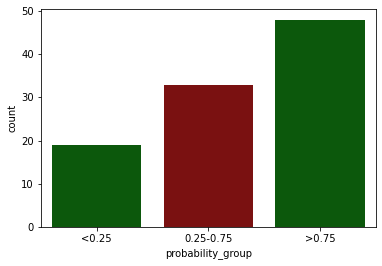

In [20]:
print(df.groupby('probability_group').size())
sns.countplot(x='probability_group', data=df, 
              palette=['darkgreen', 'darkred', 'darkgreen'], 
              order=['<0.25','0.25-0.75','>0.75'])
plt.show()

So 34% of the entries end up with a probability between 0.25 and 0.75. In this group, I really cannot be sure if the classification will work properly, since from 34 cases, 14 were missclassified (41%).

On the other hand, the remaining 66% of the entries (18% + 48%) have probabilities either higher than 0.75 or lower than 0.25. This means that the model is relatively sure of what class to assign (0/1). Within this group of entries, 100% have been correctly classified for the train test! 

#### 10. Linear regression coefficients

In [21]:
model.coef_

array([[-0.08564686,  1.98462669,  1.07716167]])

In [22]:
model.intercept_

array([-1.05450375])

#### 11. Plot logistic regression

Add normalised variables to the initial DataFrame in order to be able to make predictions on all data points and add them to the same DataFrame.

In [23]:
clean_data['NormGender'] = norm_X.T[0]
clean_data['NormAge'] = norm_X.T[1]
clean_data['NormSalary'] = norm_X.T[2]
clean_data.head()

,Gender,Age,EstimatedSalary,Purchased,NormGender,NormAge,NormSalary
0,0,19,19000,0,-1.020204,-1.781797,-1.490046
1,0,35,20000,0,-1.020204,-0.253587,-1.460681
2,1,26,43000,0,0.980196,-1.113206,-0.785290
3,1,27,57000,0,0.980196,-1.017692,-0.374182
4,0,19,76000,0,-1.020204,-1.781797,0.183751


Add columns with class prediction and predicted probability to each row:

In [24]:
def probability_row(row):
    x = [[row['NormGender'], row['NormAge'], row['NormSalary']]]
    return int(round(model.predict_proba(x)[0][1]))

def predict_row(row):
    x = [[row['NormGender'], row['NormAge'], row['NormSalary']]]
    return model.predict_proba(x)[0][1]

clean_data['PredictedProbability'] = clean_data.apply(predict_row, axis=1)
clean_data['PredictedClass'] = clean_data.apply(probability_row, axis=1)

clean_data.head(10)

,Gender,Age,EstimatedSalary,Purchased,NormGender,NormAge,NormSalary,PredictedProbability,PredictedClass
0,0,19,19000,0,-1.020204,-1.781797,-1.490046,0.002219,0
1,0,35,20000,0,-1.020204,-0.253587,-1.460681,0.045486,0
2,1,26,43000,0,0.980196,-1.113206,-0.785290,0.014867,0
3,1,27,57000,0,0.980196,-1.017692,-0.374182,0.027619,0
4,0,19,76000,0,-1.020204,-1.781797,0.183751,0.013316,0
5,0,27,58000,0,-1.020204,-1.017692,-0.344817,0.033625,0
6,1,27,84000,0,0.980196,-1.017692,0.418669,0.062549,0
7,1,32,150000,1,0.980196,-0.540127,2.356750,0.581320,1
8,0,25,33000,0,-1.020204,-1.208719,-1.078938,0.010685,0
9,1,35,65000,0,0.980196,-0.253587,-0.139263,0.142860,0


Plot probabilities predicted by the logistic regression against "Age" and "EstimatedSalary" variables, which are the ones with the most impact. We can kind of imagine the 2 dimensional shape of the sigmoid curve:

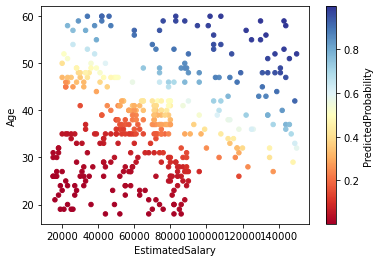

In [25]:
clean_data.plot.scatter(x='EstimatedSalary', y='Age', c='PredictedProbability', colormap='RdYlBu', sharex=False)
plt.show()

Plot classes predicted by the logistic regression, and compare to actual classes:

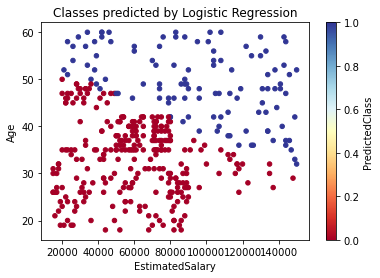

In [26]:
clean_data.plot.scatter(x='EstimatedSalary', y='Age', c='PredictedClass', colormap='RdYlBu', sharex=False)
plt.title('Classes predicted by Logistic Regression')
plt.show()

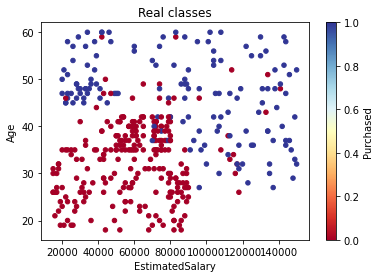

In [27]:
clean_data.plot.scatter(x='EstimatedSalary', y='Age', c='Purchased', colormap='RdYlBu', sharex=False)
plt.title('Real classes')
plt.show()

A random forest or even a decision tree would probably perform better here, as by looking at the scatter plot there are clearly delimited areas that could be detected by these regressors.